# Ukraine Russia Sentiment Analysis


### In this project, we will evaluate what people write on Twitter, analyze the positive and negative comments and create a Wordcloud

<img src=https://as1.ftcdn.net/v2/jpg/04/90/12/38/1000_F_490123889_DHOkNz4cVkRA28XAnx0pmYtfi1M8fxK3.jpg width='400'>

In [1]:
#pip install nltk

In [1]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("filename.csv")

In [3]:
df.sample(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
1733,1630359068450717703,1630359068450717703,2023-02-28 00:07:47 UTC,2023-02-28,00:07:47,0,122479748,dazza2010k,DJK2023,NaN,🇺🇸 - #US Treasury Secretary #JanetYellen visit...,en,[],[],[],0,1,3,"['us', 'janetyellen', 'kyiv', 'zelensky', 'rus...",[],https://twitter.com/dazza2010k/status/16303590...,False,NaN,1,https://pbs.twimg.com/media/FqAy44_X0Agmr7h.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8393,1630336126144659457,1630168113722392577,2023-02-27 22:36:37 UTC,2023-02-27,22:36:37,0,1344446405696483330,brennan28623389,Brennan,NaN,@ToeNailUrFace @RepThomasMassie @alphamale1339...,en,[],[],[],1,0,0,[],[],https://twitter.com/Brennan28623389/status/163...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ToeNailUrFace', 'name': ""Bea...",NaN,NaN,NaN,NaN
8647,1630335382486171648,1630100423150555136,2023-02-27 22:33:40 UTC,2023-02-27,22:33:40,0,554088231,avgvstvs_999,avgvstvs 🏴‍☠️,NaN,@jmoosman @DefenceU @KpsZSU Even ir you believ...,en,[],[],[],0,0,0,[],[],https://twitter.com/avgvstvs_999/status/163033...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'jmoosman', 'name': '🇸🇪𝕁𝕠𝕤𝕖𝕡𝕙...",NaN,NaN,NaN,NaN
7226,1630339657325223936,1630339657325223936,2023-02-27 22:50:39 UTC,2023-02-27,22:50:39,0,1538749834617753600,xoalinalixo,Chi Zhou killed all King Kongs.,NaN,My Chinese+Indians+Predators weren’t knowing t...,en,[],[],[],0,0,0,[],[],https://twitter.com/xoalinalixo/status/1630339...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3706,1630351732378042370,1629594728395055104,2023-02-27 23:38:38 UTC,2023-02-27,23:38:38,0,4263279793,kaily_bear,Kaily Bear #AutismPride,NaN,@Magickalhack @SirenofNytrate @AliceCaterpill1...,en,[],[],[],0,0,0,[],[],https://twitter.com/Kaily_Bear/status/16303517...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Magickalhack', 'name': 'Magi...",NaN,NaN,NaN,NaN


In [4]:
df['tweet']=df['tweet'].str.lower()
df['tweet']=df['tweet'].str.replace('[^\w\s]','',regex= True)
df['tweet']=df['tweet'].str.replace('\n','')
df['tweet']=df['tweet'].str.replace('\d+','', regex = True)
df['tweet']=df['tweet'].str.replace('\r','', regex = True)

In [5]:
df['tweet']

0        nazijaeger__ derwener anonymous russia is a pl...
1        the russia haarp which could destroy usa in on...
2        putin gives steven seagal russiaamps order of ...
3        mainelifer baddcompani its always projection o...
4        pottingpinks mfa_russia mod_russia mil_hist_rf...
                               ...                        
10009    wallacemick its not ukraine which investere wa...
10010    tom_username_ there were very dark rumors that...
10011    elonmusk if russia lose the rothschild are com...
10012    ronfilipkowski look forward to russia liberati...
10013    lyla_lilas i read it yes it is heartbreaking  ...
Name: tweet, Length: 10014, dtype: object

In [6]:
df['tweet'] = df['tweet'].str.replace('__', '').str.replace('_', '')

In [7]:
df['tweet']

0        nazijaeger derwener anonymous russia is a plac...
1        the russia haarp which could destroy usa in on...
2        putin gives steven seagal russiaamps order of ...
3        mainelifer baddcompani its always projection o...
4        pottingpinks mfarussia modrussia milhistrf muz...
                               ...                        
10009    wallacemick its not ukraine which investere wa...
10010    tomusername there were very dark rumors that z...
10011    elonmusk if russia lose the rothschild are com...
10012    ronfilipkowski look forward to russia liberati...
10013    lylalilas i read it yes it is heartbreaking  r...
Name: tweet, Length: 10014, dtype: object

In [2]:
#pip install textblob

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [11]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word)for word in words]

In [12]:
TextBlob(df['tweet'][550]).sentiment

Sentiment(polarity=0.2333333333333333, subjectivity=0.562962962962963)

In [13]:
from textblob import TextBlob
def detect_sentiment(tweet):
    return TextBlob(tweet).sentiment.polarity

In [14]:
df['Sentiment']=df['tweet'].apply(detect_sentiment)

In [15]:
df.Sentiment.value_counts()

Sentiment
 0.000000    3752
 0.500000     266
 0.200000     236
 0.250000     186
 0.100000     145
             ... 
-0.225000       1
-0.057143       1
 0.139683       1
-0.850000       1
-0.347500       1
Name: count, Length: 1685, dtype: int64

In [3]:
#pip install matplotlib

In [4]:
#pip install seaborn

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 0 neutral, 1 positiv, 2 negativ
def sntmnt(score):
    if score >0.2:
        return 1
    elif score<-0.2:
        return 2
    else:
        return 0

In [20]:
df['class']=df['Sentiment'].apply(sntmnt)

<Axes: xlabel='class', ylabel='count'>

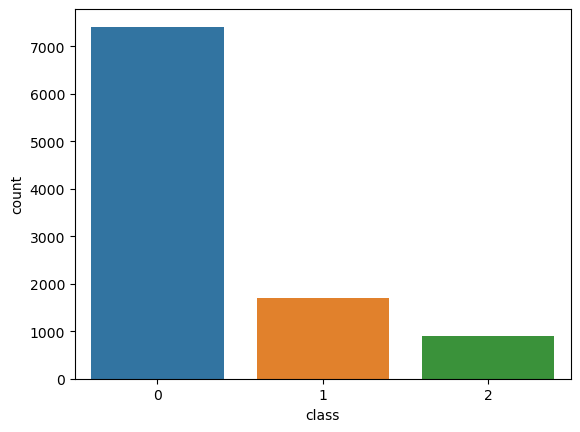

In [21]:
sns.countplot(x=df['class'])

In [22]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10014,analyzer=lemmafn)

In [23]:
x=df['tweet']
y=df['class']

In [24]:
x

0        nazijaeger derwener anonymous russia is a plac...
1        the russia haarp which could destroy usa in on...
2        putin gives steven seagal russiaamps order of ...
3        mainelifer baddcompani its always projection o...
4        pottingpinks mfarussia modrussia milhistrf muz...
                               ...                        
10009    wallacemick its not ukraine which investere wa...
10010    tomusername there were very dark rumors that z...
10011    elonmusk if russia lose the rothschild are com...
10012    ronfilipkowski look forward to russia liberati...
10013    lylalilas i read it yes it is heartbreaking  r...
Name: tweet, Length: 10014, dtype: object

In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10009    0
10010    2
10011    0
10012    0
10013    0
Name: class, Length: 10014, dtype: int64

In [26]:
x=vect.fit_transform(x)

In [ ]:
x

# CNN

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [29]:
model=Sequential()

model.add(Dense(128,activation='relu'))
model.add(Dropout(.7))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3)) 
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20,verbose=1)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4652 - loss: 1.1487 - val_accuracy: 0.7489 - val_loss: 0.7610
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7281 - loss: 0.7640 - val_accuracy: 0.7489 - val_loss: 0.6906
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7349 - loss: 0.7215 - val_accuracy: 0.7509 - val_loss: 0.6708
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7533 - loss: 0.6462 - val_accuracy: 0.7644 - val_loss: 0.6210
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7823 - loss: 0.5679 - val_accuracy: 0.7708 - val_loss: 0.6102
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8289 - loss: 0.4797 - val_accuracy: 0.7858 - val_loss: 0.6007
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8542 - loss: 0.4045 - val_accuracy: 0.7893 - val_loss: 0.6107
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8688 - loss: 0.3610 - val_accuracy: 0.

In [31]:
loss,accuracy=model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8131 - loss: 0.7034


In [32]:
accuracy

0.8112830519676208

In [33]:
tahmin=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [34]:
model.save('Tweet.h5')

In [35]:
import matplotlib.pyplot as plt

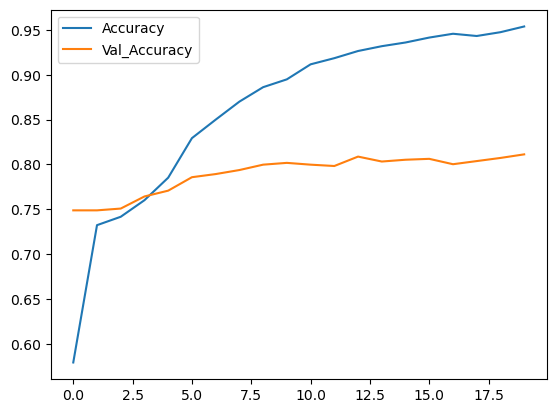

In [36]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [37]:
loss_f=pd.DataFrame(history.history)

<Axes: >

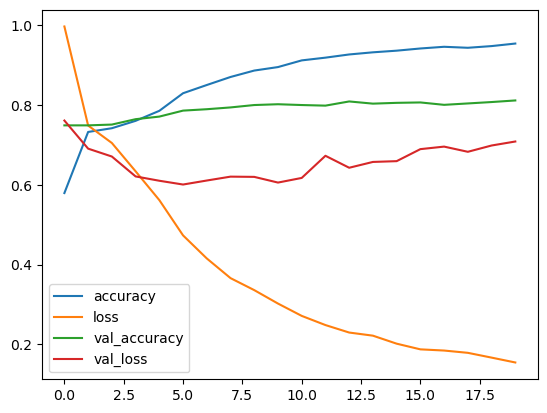

In [38]:
loss_f.plot()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [40]:
import numpy as np

In [41]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[1424,   59,   16],
       [ 191,  165,    0],
       [ 111,    1,   36]])

In [42]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

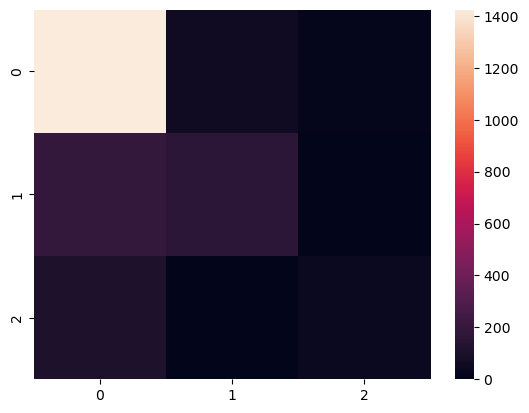

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [44]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1499
           1       0.73      0.46      0.57       356
           2       0.69      0.24      0.36       148

    accuracy                           0.81      2003
   macro avg       0.75      0.55      0.60      2003
weighted avg       0.80      0.81      0.79      2003



## Sentiment analysis

In [45]:
sawc= df[(df['class'] == 1) | (df['class'] == 2)]

In [46]:
df[df['class'] == 1]   # Positiv tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Sentiment,class
6,1630366212424339458,1630366212424339458,2023-02-28 00:36:10 UTC,2023-02-28,00:36:10,0,1594629551019073536,aylanma09475236,Aylan Macon,NaN,riyadh im here in exital yarmuk and in exital...,ca,[],['http://Wa.me/+84332685859'],[],0,0,0,"['massage_in_riyadh', 'مبادل_الرياض', 'موجب_ال...",[],https://twitter.com/AylanMa09475236/status/163...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.395455,1
7,1630366210532552706,1629933112971935745,2023-02-28 00:36:09 UTC,2023-02-28,00:36:09,0,244366930,cb1971mission,Carlos Belmares,NaN,kathykrobot ronfilipkowski hmm zelensky did co...,en,[],[],[],0,0,0,[],[],https://twitter.com/CB1971MISSION/status/16303...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kathykrobot', 'name': 'Kathl...",NaN,NaN,NaN,NaN,0.266667,1
11,1630366182283829248,1630366182283829248,2023-02-28 00:36:03 UTC,2023-02-28,00:36:03,0,1431442853306114050,feklarptaak,feklar,NaN,elonmusk the ceo of tesla warns that the prolo...,en,[],['https://www.thestreet.com/technology/elon-mu...,[],0,0,0,[],[],https://twitter.com/feklarptaak/status/1630366...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.400000,1
12,1630366180199350278,1630366180199350278,2023-02-28 00:36:02 UTC,2023-02-28,00:36:02,0,5508672,nwi,nwi.com,NaN,the united states imposed more tariffs and ste...,en,[],['https://www.nwitimes.com/business/local/new-...,[],0,0,0,[],[],https://twitter.com/nwi/status/163036618019935...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.400000,1
16,1630366166383222784,1630366160679051266,2023-02-28 00:35:59 UTC,2023-02-28,00:35:59,0,210846490,oneillquigley,Michael O'Neill Accountable Government,NaN,but the moldovan presidents accusations were ...,en,[],[],[],0,0,0,[],[],https://twitter.com/oneillquigley/status/16303...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,1630331217886482432,1629985276616646656,2023-02-27 22:17:07 UTC,2023-02-27,22:17:07,0,1455326324877250561,muisrijk,Ricco Topo,NaN,jacksonhinklle this woman is the poster child ...,en,[],[],[],0,0,0,[],[],https://twitter.com/MuisRijk/status/1630331217...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'jacksonhinklle', 'name': 'Ja...",NaN,NaN,NaN,NaN,0.500000,1
9984,1630331185720336389,1630298569331691520,2023-02-27 22:16:59 UTC,2023-02-27,22:16:59,0,1604647780466974720,johnholborn4,John Holborn,NaN,muse realceoofantifa hahahahahahaaaa russia c...,en,[],[],[],1,0,0,[],[],https://twitter.com/JohnHolborn4/status/163033...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'muse_4', 'name': 'Muse of Fi...",NaN,NaN,NaN,NaN,0.433333,1
9987,1630331180385030144,1630284401878638593,2023-02-27 22:16:58 UTC,2023-02-27,22:16:58,0,619292337,timskimaher,Tim Maher,NaN,sgforgoodstella godi love russia and god loves...,en,[],[],[],0,0,1,[],[],https://twitter.com/timskimaher/status/1630331...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SgforgoodStella', 'name': 's...",NaN,NaN,NaN,NaN,0.500000,1
9996,1630331144469094402,1630263716473077766,2023-02-27 22:16:49 UTC,2023-02-27,22:16:49,0,1422250163100397569,giarc101297391,Giarc,NaN,hosehound jackposobiec yes isnt it funny that ...,en,[],[],[],0,0,0,[],[],https://twitter.com/Giarc101297391/status/1630...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Hose_Hound', 'name': 'BAH!',...",NaN,NaN,NaN,NaN,0.250000,1


## Wordcloud

In [47]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [48]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('resim.jpg.webp'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [49]:
import matplotlib.pyplot as plt

In [50]:
good=df[df['class']==1]['tweet']  #positiv

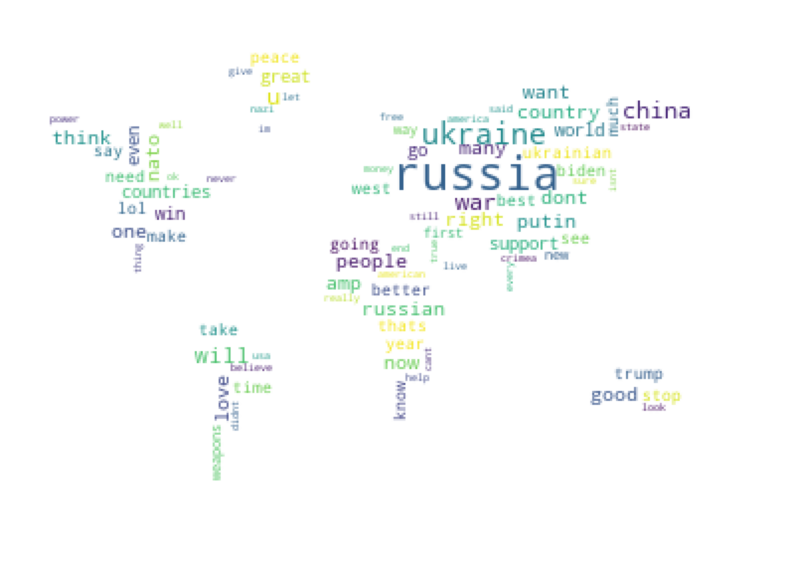

In [51]:
wc(good,'white')

In [52]:
bad=df[df['class']==1]['tweet'] #negativ

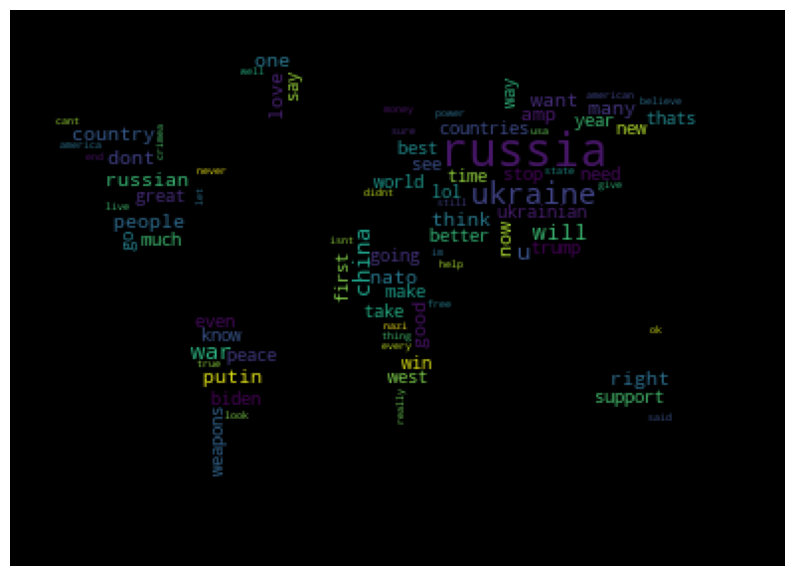

In [53]:
wc(bad,'black')

## Here, Accuracy is 0.81, unfortunately the gap between accuracy and val.accuracy is very wide